<a href="https://colab.research.google.com/github/pkams/MLOps-Zoomcamp/blob/main/MLOPS_Zoomcamp_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet

--2022-05-16 19:02:03--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.216.238.11
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.216.238.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘fhv_tripdata_2021-01.parquet’

fhv_tripdata_2021-0 100%[===================>]  11.33M  16.3MB/s    in 0.7s    

2022-05-16 19:02:04 (16.3 MB/s) - ‘fhv_tripdata_2021-01.parquet’ saved [11886281/11886281]

--2022-05-16 19:02:04--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet
Reusing existing connection to nyc-tlc.s3.amazonaws.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘fhv_tripdata_2021-02.parquet’

fhv_tripdata_2021-0 100%[===================>]  10.15M  50.8MB/s    in 0.2s    

2022-05-16 19:02:04 (50.8 MB/s) - ‘fhv_trip

In [3]:
df = pd.read_parquet('/content/fhv_tripdata_2021-01.parquet')
df.shape

(1154112, 7)

Q1. Downloading the data

Read the data for January. How many records are there?

* 1054112
* **1154112** ◀
* 1254112
* 1354112

In [4]:
df['duration'] = ((df['dropOff_datetime'] - df['pickup_datetime']).dt.total_seconds()) / 60
df['duration'].mean()

19.1672240937939

Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the average trip duration in January?

* 15.16
* **19.16** ◀
* 24.16
* 29.16

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


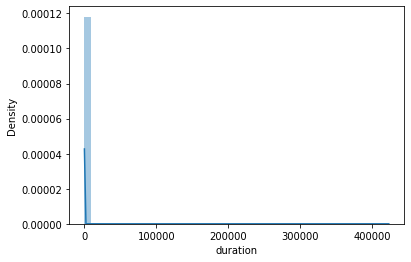

In [5]:
sns.distplot(df['duration'])

**Data preparation**

Check the distribution of the duration variable. There are some outliners.

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

How many records did you drop?

In [6]:
limited_duration_df = df[(df.duration >= 1) & (df.duration <= 60)]
limited_duration_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


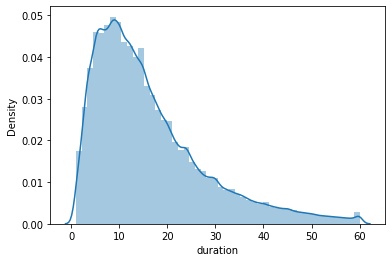

In [7]:
sns.distplot(limited_duration_df['duration'])

In [8]:
old_len = len(df)
new_len = len(limited_duration_df)
dropped_rows = old_len - new_len
dropped_rows

44286

In [9]:
features = ['PUlocationID', 'DOlocationID']
limited_duration_df[features] = limited_duration_df[features].fillna(-1).astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
limited_duration_df['PUlocationID'].value_counts(normalize=True)

-1.0     8.352733e-01
221.0    7.505681e-03
206.0    6.124383e-03
129.0    4.846706e-03
115.0    3.678054e-03
             ...     
111.0    4.505211e-06
27.0     3.604169e-06
34.0     2.703126e-06
2.0      1.802084e-06
110.0    9.010421e-07
Name: PUlocationID, Length: 262, dtype: float64

Q3. Missing values
The features we'll user for our model are the pickup and dropoff location IDs.

But they have a lot of missing values there. Let's replace them with "-1"

What's the factions of missing values for the pickup location ID? (Or the fraction of "-1"s after you filled the NAs)

* 53%
* 63%
* 73%
* **83%** ◀

In [11]:
from sklearn.feature_extraction import DictVectorizer

In [68]:
dv = DictVectorizer()
train_dicts = limited_duration_df[['PUlocationID', 'DOlocationID']].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [69]:
X_train.shape

(1109826, 525)

Q4. One-hot encoding
Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix? (The number of columns)

* 2
* 152
* 352
* **525** ◀
* 725

In [70]:
y_train = limited_duration_df['duration'].values

In [71]:
y_train.shape

(1109826,)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

np.sqrt(mean_squared_error(y_train, y_pred))

10.528519107212679

Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters
Calculate the RMSE of the model on the training data
What's the RMSE on train?

* 5.52
* **10.52** ◀
* 15.52
* 20.52

In [81]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = ((df['dropOff_datetime'] - df['pickup_datetime']).dt.total_seconds()) / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    features = ['PUlocationID', 'DOlocationID']
    df[features] = df[features].fillna(-1).astype(str)
    
    return df

In [82]:
df_val = read_dataframe('/content/fhv_tripdata_2021-02.parquet')
val_dicts = df_val[['PUlocationID', 'DOlocationID']].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val['duration'].values

In [84]:
df_val.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1.0,225.0,None,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1.0,61.0,None,B00037,8.966667


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


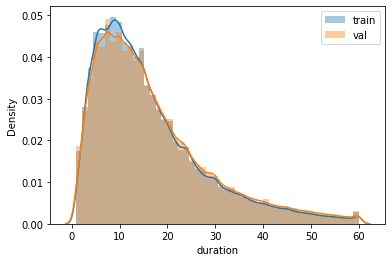

In [79]:
sns.distplot(limited_duration_df['duration'], label='train')
sns.distplot(df_val['duration'], label='val')
plt.legend()
plt.show()

In [80]:
y_pred = lr.predict(X_val)

np.sqrt(mean_squared_error(y_val, y_pred))

11.3644342486764

Q6. Evaluating the model
Now let's apply this model to the validation dataset.

What's the RMSE on validation?

* 7.85
* **12.85** ◀
* 17.85
* 22.85